## Pandas

### Spis treści:
* [Import biblioteki](#0)
* [Ćwiczenie 121](#1)
* [Ćwiczenie 122](#2)
* [Ćwiczenie 123](#3)
* [Ćwiczenie 124](#4)
* [Ćwiczenie 125](#5)
* [Ćwiczenie 126](#6)
* [Ćwiczenie 127](#7)
* [Ćwiczenie 128](#8)
* [Ćwiczenie 129](#9)
* [Ćwiczenie 130](#10)

### <a name='0'></a>Import biblioteki

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

sns.set()
np.__version__

'1.21.6'

Funkcja _fetch_financial_data()_ pobiera dane dotyczące notowań spółek giełdowych. Będzie wykorzystywana w poniższych ćwiczeniach. Aby pobrać dane konkretnej spółki należy przekazać odpowiedni ticker (symbol) spółki.

Kilka przykładowych tickerów spółek:
* AMZN - Amazon
* GOOGL - Google
* MSFT - Microsoft
* AAPL - Apple
* NKE - Nike
* WMT - Walmart

In [2]:
def fetch_financial_data(company='AMZN'):
    """
    This function fetches stock market quotations.
    """
    import pandas_datareader.data as web
    return web.DataReader(name=company, data_source='stooq')

### <a name='1'></a> Ćwiczenie 121
Wykorzystując funkcję _fetch_financial_data()_ pobierz notowania dla spółki Google (Alphabet) i przypisz do zmiennej _google_. Wyświetl obiekt _google_.

In [4]:
google=fetch_financial_data('GOOGL') 
google

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-12,120.2600,121.6800,119.4600,121.6800,19096268
2022-08-11,121.2800,121.4900,118.5600,118.8400,24293654
2022-08-10,118.7800,120.9200,118.4100,119.7000,30930350
2022-08-09,117.1350,117.3200,115.7100,116.6300,19086465
2022-08-08,118.3900,120.1500,116.8800,117.3000,19169479
...,...,...,...,...,...
2017-08-22,46.3480,47.0981,46.3085,47.0200,35193720
2017-08-21,46.2885,46.4125,45.9300,46.0435,25997980
2017-08-18,46.3490,46.5510,46.1725,46.3090,26712200


### <a name='2'></a> Ćwiczenie 122
Wyświetl podstawowe informacje na temat obiektu _google_.

In [5]:
google.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1257 entries, 2022-08-12 to 2017-08-16
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    1257 non-null   float64
 1   High    1257 non-null   float64
 2   Low     1257 non-null   float64
 3   Close   1257 non-null   float64
 4   Volume  1257 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 58.9 KB


Wyświetl podstawowe statystyki o obiekcie _google_.

In [6]:
google.describe()

,Open,High,Low,Close,Volume
count,1257.000000,1257.000000,1257.000000,1257.000000,1.257000e+03
mean,81.930148,82.807842,81.048659,81.954212,3.528730e+07
std,31.788909,32.104808,31.405760,31.752103,1.602983e+07
min,45.997500,46.412500,45.930000,46.043500,9.312760e+06
25%,56.545000,57.117000,55.835000,56.460000,2.517998e+07
50%,67.160500,67.681500,66.462000,67.144500,3.140872e+07
75%,111.552000,113.279000,110.382000,111.952000,4.014388e+07
max,151.250000,151.547000,148.899000,149.838000,1.331771e+08


Zwróć uwagę na precyzję zapisu poszczególnych statystyk.
Spróbuj ustawić odpowiednie opcje biblioteki _pandas_, tak aby wyświetlać dane z dokładnością do dwóch miejsc po przecinku.

__Wskazówka:__ 
https://pandas.pydata.org/pandas-docs/stable/user_guide/options.html

In [7]:
pd.set_option('precision', 2)
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1.26e+03
mean,81.93,82.81,81.05,81.95,3.53e+07
std,31.79,32.10,31.41,31.75,1.60e+07
min,46.00,46.41,45.93,46.04,9.31e+06
25%,56.55,57.12,55.84,56.46,2.52e+07
50%,67.16,67.68,66.46,67.14,3.14e+07
75%,111.55,113.28,110.38,111.95,4.01e+07
max,151.25,151.55,148.90,149.84,1.33e+08


__Dodatkowo:__
Poniższe ustawienie stłumi także notację wykładniczą (patrz kolumna _Volume_).

In [8]:
pd.options.display.float_format = '{:.2f}'.format
google.describe()

,Open,High,Low,Close,Volume
count,1257.00,1257.00,1257.00,1257.00,1257.00
mean,81.93,82.81,81.05,81.95,35287301.93
std,31.79,32.10,31.41,31.75,16029827.71
min,46.00,46.41,45.93,46.04,9312760.00
25%,56.55,57.12,55.84,56.46,25179980.00
50%,67.16,67.68,66.46,67.14,31408720.00
75%,111.55,113.28,110.38,111.95,40143880.00
max,151.25,151.55,148.90,149.84,133177100.00


Zbuduj wykres ceny zamknięcia (_Close_) dla obiektu _google_.

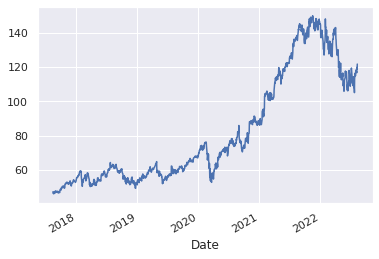

In [9]:
google['Close'].plot()

### <a name='3'></a> Ćwiczenie 123
Zamień indeks _Date_ na kolumnę. Przypisz trwale zmiany do zniennej _google_.

In [10]:
google=google.reset_index()
google

,Date,Open,High,Low,Close,Volume
0,2022-08-12,120.26,121.68,119.46,121.68,19096268
1,2022-08-11,121.28,121.49,118.56,118.84,24293654
2,2022-08-10,118.78,120.92,118.41,119.70,30930350
3,2022-08-09,117.14,117.32,115.71,116.63,19086465
4,2022-08-08,118.39,120.15,116.88,117.30,19169479
...,...,...,...,...,...,...
1252,2017-08-22,46.35,47.10,46.31,47.02,35193720
1253,2017-08-21,46.29,46.41,45.93,46.04,25997980
1254,2017-08-18,46.35,46.55,46.17,46.31,26712200
1255,2017-08-17,47.15,47.19,46.38,46.38,33477720


Przypisz dwie nowe kolumny do obiektu _google_ dodając kolumnę z aktualnym numerem miesiąca o nazwie _'Month'_ oraz z rokiem o nazwie _'Year'_.

In [11]:
google['Month']=google['Date'].dt.month
google['Year']=google['Date'].dt.year
google

,Date,Open,High,Low,Close,Volume,Month,Year
0,2022-08-12,120.26,121.68,119.46,121.68,19096268,8,2022
1,2022-08-11,121.28,121.49,118.56,118.84,24293654,8,2022
2,2022-08-10,118.78,120.92,118.41,119.70,30930350,8,2022
3,2022-08-09,117.14,117.32,115.71,116.63,19086465,8,2022
4,2022-08-08,118.39,120.15,116.88,117.30,19169479,8,2022
...,...,...,...,...,...,...,...,...
1252,2017-08-22,46.35,47.10,46.31,47.02,35193720,8,2017
1253,2017-08-21,46.29,46.41,45.93,46.04,25997980,8,2017
1254,2017-08-18,46.35,46.55,46.17,46.31,26712200,8,2017
1255,2017-08-17,47.15,47.19,46.38,46.38,33477720,8,2017


### <a name='4'></a> Ćwiczenie 124
Policz średnią cenę zamknięcia (_Close_) dla poszczególnego roku (pogrupuj dane po roku - kolumna _Year_ i następnie policz wartość średnią).

In [12]:
(google.groupby('Year')['Close']).mean()

Year
2017    50.10
2018    56.10
2019    59.56
2020    73.95
2021   124.22
2022   124.36
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.

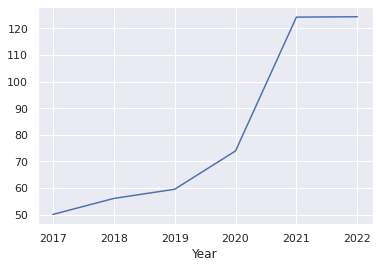

In [13]:
(google.groupby('Year')['Close']).mean().plot()

Policz średnią cenę zamknięcia (_Close_) dla miesiąca (pogrupuj dane po miesiącu - kolumna _Month_ i następnie policz wartość średnią).

In [14]:
google.groupby('Month')['Close'].mean()

Month
1    81.07
2    84.69
3    83.23
4    82.93
5    81.15
6    83.85
7    86.31
8    83.03
9    77.67
10   76.07
11   81.04
12   82.65
Name: Close, dtype: float64

Otrzymane wartości przedstaw na wykresie wykorzystując metodę _plot()_.
Zauważ, które miesiące mogą wskazywać na słabsze okresy na giełdzie.

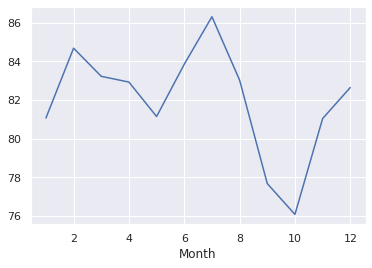

In [15]:
google.groupby('Month')['Close'].mean().plot()

### <a name='5'></a> Ćwiczenie 125
Pogrupuj dane z obiektu _google_ na poziomie roku i miesiąca. Następnie policz wartość średnią.

In [16]:
google.groupby(['Year','Month']).mean()

Open   High    Low  Close      Volume
Year Month                                        
2017 8      46.74  47.10  46.49  46.80 26733308.33
     9      47.27  47.54  46.95  47.29 29444208.00
     10     49.93  50.31  49.60  49.96 33327427.27
     11     52.31  52.63  51.95  52.35 27213558.10
     12     52.71  53.07  52.36  52.69 29719058.00
...           ...    ...    ...    ...         ...
2022 4     129.19 130.50 126.67 128.07 38059069.00
     5     112.79 114.86 111.02 113.19 40497669.52
     6     112.29 114.31 110.93 112.43 36708275.24
     7     112.02 114.13 110.30 112.65 39481596.00
     8     117.46 119.01 116.55 117.79 22810799.20

[61 rows x 5 columns]

### <a name='6'></a> Ćwiczenie 126
Znajdź indeks dla którego kolumna _Close_ przyjmuje wartość największą.

In [17]:
google['Close'].argmax()

183

Wytnij wiersz dla tego indeksu z obiektu _google_ jako obiekt DataFrame. Odczytaj datę.

In [20]:
google.iloc[[google['Close'].argmax()]]

,Date,Open,High,Low,Close,Volume,Month,Year
183,2021-11-18,148.24,150.58,147.88,149.84,35628220,11,2021


### <a name='7'></a> Ćwiczenie 127
Z obiektu _google_ wytnij kolumny _Date_, _Open_, _Close_, _Volume_.
Nie zmieniaj pierwotnego obiektu _google_!


In [21]:
google[['Date', 'Open', 'Close', 'Volume']]

,Date,Open,Close,Volume
0,2022-08-12,120.26,121.68,19096268
1,2022-08-11,121.28,118.84,24293654
2,2022-08-10,118.78,119.70,30930350
3,2022-08-09,117.14,116.63,19086465
4,2022-08-08,118.39,117.30,19169479
...,...,...,...,...
1252,2017-08-22,46.35,47.02,35193720
1253,2017-08-21,46.29,46.04,25997980
1254,2017-08-18,46.35,46.31,26712200
1255,2017-08-17,47.15,46.38,33477720


### <a name='8'></a> Ćwiczenie 128
Ustaw z powrotem indeks dla kolumny _Date_. Wyświetl obiekt _google_.

In [22]:
google=google.set_index('Date')
google

,Open,High,Low,Close,Volume,Month,Year
Date,,,,,,,
2022-08-12,120.26,121.68,119.46,121.68,19096268,8,2022
2022-08-11,121.28,121.49,118.56,118.84,24293654,8,2022
2022-08-10,118.78,120.92,118.41,119.70,30930350,8,2022
2022-08-09,117.14,117.32,115.71,116.63,19086465,8,2022
2022-08-08,118.39,120.15,116.88,117.30,19169479,8,2022
...,...,...,...,...,...,...,...
2017-08-22,46.35,47.10,46.31,47.02,35193720,8,2017
2017-08-21,46.29,46.41,45.93,46.04,25997980,8,2017
2017-08-18,46.35,46.55,46.17,46.31,26712200,8,2017


### <a name='9'></a> Ćwiczenie 129
Usuń na stałe kolumny _Year_ i _Month_ z obiektu _google_. Wyświetl obiekt _google_.

In [23]:
google = google.drop(columns=['Year', 'Month'])
google

,Open,High,Low,Close,Volume
Date,,,,,
2022-08-12,120.26,121.68,119.46,121.68,19096268
2022-08-11,121.28,121.49,118.56,118.84,24293654
2022-08-10,118.78,120.92,118.41,119.70,30930350
2022-08-09,117.14,117.32,115.71,116.63,19086465
2022-08-08,118.39,120.15,116.88,117.30,19169479
...,...,...,...,...,...
2017-08-22,46.35,47.10,46.31,47.02,35193720
2017-08-21,46.29,46.41,45.93,46.04,25997980
2017-08-18,46.35,46.55,46.17,46.31,26712200


### <a name='10'></a> Ćwiczenie 130
Przypisz polskie nazwy kolumn (bez polskich znaków):
* Open -> Otwarcie
* High -> Najwyzszy
* Low -> Najnizszy
* Close -> Zamkniecie
* Volume -> Wolumen

do obiektu _google_. Wyświetl obiekt _google_.

In [24]:
google.columns = ['Otwarcie', 'Najwyzszy', 'Najnizszy', 'Zamkniecie', 'Wolumen']
google

,Otwarcie,Najwyzszy,Najnizszy,Zamkniecie,Wolumen
Date,,,,,
2022-08-12,120.26,121.68,119.46,121.68,19096268
2022-08-11,121.28,121.49,118.56,118.84,24293654
2022-08-10,118.78,120.92,118.41,119.70,30930350
2022-08-09,117.14,117.32,115.71,116.63,19086465
2022-08-08,118.39,120.15,116.88,117.30,19169479
...,...,...,...,...,...
2017-08-22,46.35,47.10,46.31,47.02,35193720
2017-08-21,46.29,46.41,45.93,46.04,25997980
2017-08-18,46.35,46.55,46.17,46.31,26712200
